# 1. Import required libraries and read the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

import pickle

# 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [2]:
df = pd.read_csv(r"C:\Users\SANATH\Downloads\loan_approval_data.csv")
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


In [3]:
df.shape

(614, 13)

- 614 Rows 13 Columns

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
applicantincome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicantincome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loanamount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


- 7 Categorical Columns, 6 Numerical columns

# 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. 

In [6]:
df.isnull().sum()

loan_id               0
gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [7]:
((df.isnull().sum())/len(df))*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

- There are missing values in personal details columns like gender, marital status and no. of dependents, which I think would be appropriate to remove them as we cannot guess them.
- The missing values in other key columns which affect the outcome of loan, should also be removed as they are crucial for allocating the loan to customer.
- The percentage of missing values is less, so it would be better to remove the null values to decrease their impact on analysis.

In [8]:
df.dropna(inplace=True)

In [9]:
((df.isnull().sum())/len(df))*100

loan_id              0.0
gender               0.0
married              0.0
dependents           0.0
education            0.0
self_employed        0.0
applicantincome      0.0
coapplicantincome    0.0
loanamount           0.0
loan_amount_term     0.0
credit_history       0.0
property_area        0.0
loan_status          0.0
dtype: float64

In [10]:
df.drop(['loan_id'],axis=1, inplace=True)

In [11]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y
5,male,yes,2.0,graduate,yes,5417,4196.0,267.0,360.0,1.0,urban,y


# 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

In [12]:
categorical_features = ['gender', 'married', 'dependents', 'education', 'self_employed', 'credit_history', 'property_area']

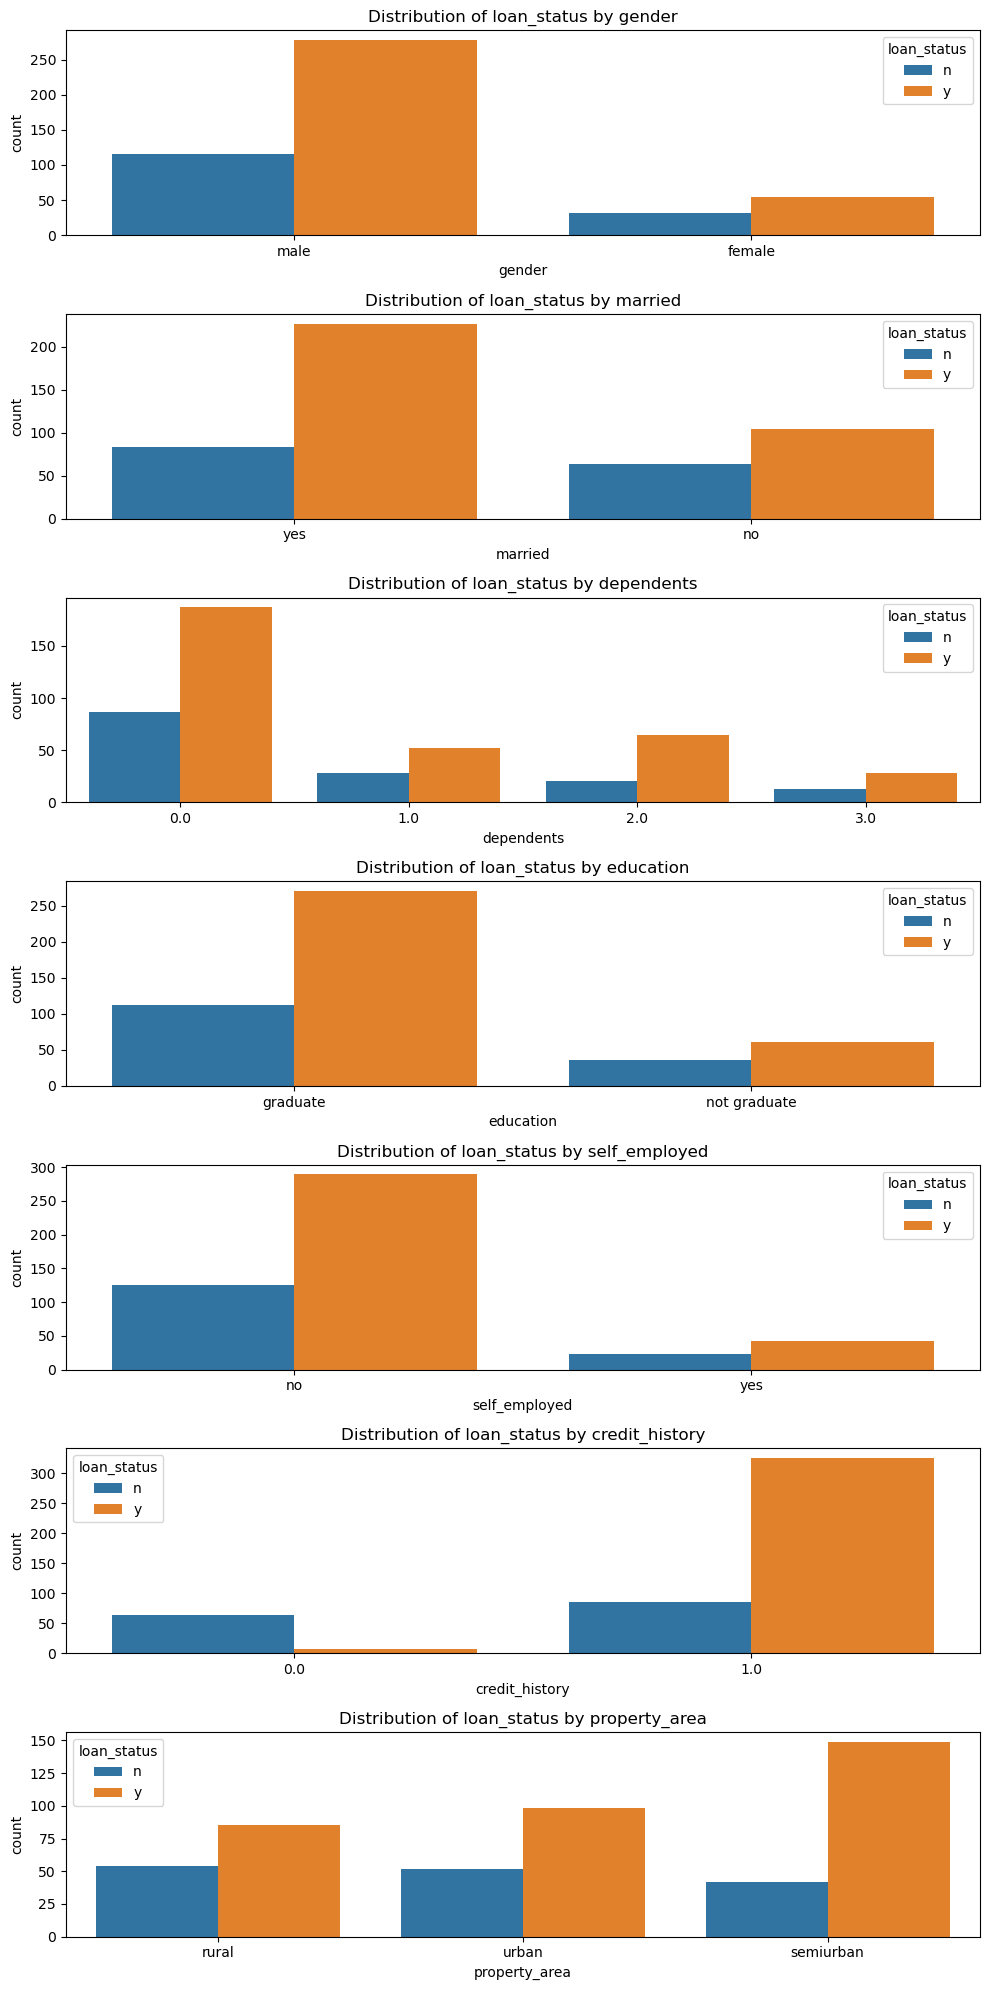

In [13]:
fig, axes = plt.subplots(nrows=len(categorical_features), ncols=1, figsize=(10, 20))
for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, hue='loan_status', data=df, ax=axes[i])
    axes[i].set_title(f'Distribution of loan_status by {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('count')
    
plt.tight_layout()
plt.show()

 - The number of loans approved is higher than rejection in the given dataset.
 - The most preferred property area for loan approval is semi-urban followed by urban and rural areas.
 - Loans approved for non self-employed are around 7 times more than loans approved for self-employed.
 - Loans approved for Graduates are around 3 times more than loans approved for non-graduates.
 - Those who are married have secured more loans than those who are not married.
 - Loans approved for males are higher than females in the given dataset.

# 5. Encode the categorical data.

In [14]:
lab_enc = LabelEncoder()
for i in df.select_dtypes('object'):
    df[i] = lab_enc.fit_transform(df[i])
    
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2,1


# 6. Separate the target and independent features and split the data into train and test.

In [15]:
X = df.drop('loan_status', axis = 1)
Y = df['loan_status']

In [16]:
X.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(336, 11) (144, 11)
(336,) (144,)


In [18]:
ss = StandardScaler()

X_train = ss.fit_transform(X_train.iloc[:,:])
X_test = ss.fit_transform(X_test.iloc[:,:])

# 7. Build any classification model to predict the loan status of the customer and save your model using pickle

In [19]:
def mdl(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(Y_test, prediction)
    return accuracy

In [20]:
logr = LogisticRegression()
ls = pd.DataFrame()

score = mdl(logr, X_train, X_test, Y_train, Y_test)
print("The r2_score is : ", score)

The r2_score is :  0.7708333333333334


In [21]:
ls['Logistic_regression'] = pd.Series(score)
ls

,Logistic_regression
0,0.770833


In [31]:
with open("model.pkl", "wb") as model_file:
    pickle.dump(mdl, model_file)

# #Create a basic HTML form for the frontend

# Create a file *Index.html* in the templates folder and copy the following code.

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Home Page</title>
    <link rel="stylesheet" type="text/css" href="../static/Style.css">
</head>
<body>
    <div class="container">
        <div id="content">
            <h1 id="tag">Please login/Signup to check loan eligibility</h1><br/>
            <br/>
            <button class="click"  onclick="window.location='{{ url_for('login')}}';" >Login Now</button><br/><br/>
            <button class="click"  onclick="window.location='{{ url_for('register')}}';" >Register Now</button>
            <br/><br/>
        </div>
    </div>

</body>
</html>

# Create a file *Register.html* in the templates folder and copy the following code.

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Register Page</title>
    <link rel="stylesheet" type="text/css" href="../static/Style.css">
</head>
<body>
<body>
    <div class="container">
        <div id="content">
            <h1 id="tag">Register Page</h1><br/>
                {% with messages = get_flashed_messages(with_categories=true) %}
                {% if messages %}
                    {% for category, message in messages %}
                        <div class="notification alert {{ category }}">
                            {{ message }}. Go to login page.
                        </div><br/>
                    {% endfor %}
                {% endif %}
                {% endwith %}
            <form id="form" method="post" name="myform" action="{{ url_for('register')}}" >
                <input name="username" type="text" placeholder="Username" required>
                <input name="password" type="password" placeholder="Password" required>
                <button id="login" type="submit">Register</button>
            </form>
            <br/><br/>
            <button class="click" onclick="window.location='{{ url_for('login')}}';" >Already have an account? Log In</button>
            <br/><br/>
        </div>
    </div>

</body>
</html>

# Create a file *Login.html* in the templates folder and copy the following code.

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Login Page</title>
    <link rel="stylesheet" type="text/css" href="../static/Style.css">
</head>
<body>
    <div class="container">
        <div id="content">
            <h1 id="tag">Login Page</h1><br/>
                {% with messages = get_flashed_messages() %}
                {% if messages %}
                    <div class="notification">
                        {{ messages[0] }}
                    </div><br/>
                {% endif %}
                {% endwith %}
            <form id="form" method="post" name="myform" action="{{ url_for('login')}}" >
                <input name="username" type="text" placeholder="Username" required>
                <input name="password" type="password" placeholder="Password" required>
                <button id="login" type="submit">Login</button>
            </form>
            <br/><br/>
            <button class="click"  onclick="window.location='{{ url_for('register')}}';" >Don't have an account? Sign Up</button>
            <br/><br/>
        </div>
    </div>

</body>
</html>

# Create a file *Predict.html* in the templates folder and copy the following code.

In [ ]:
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Loan Prediction Page</title>
    <link rel="stylesheet" type="text/css" href="../static/Style.css">
</head>
<body>
    <div class="container-resume">
    <div id="predict_content">
        <div>
           <header><h1>House Loan Eligibility Prediction</h1></header>
           <div id="predict">
               <h3>{{ prediction_text }}</h3>
           </div>
           <div>
                <h3>Please enter the details in order to check your house loan eligibility</h3>
                <form method="POST" action="{{ url_for('predict')}}" >
                    <table>
                        <tr>
                            <td><p>Gender</p></td>
                            <td><select name="Gender" id="gender" required="required">
                                    <option value="1">Male</option>
                                    <option value="0">Female</option>
                                </select>
                            </td>
                        </tr>
                        <tr>
                            <td><p>Married</p></td>
                            <td><select name="Married" id="married" required="required">
                                    <option value="0">No</option>
                                    <option value="1">Yes</option>
                                </select>
                            </td>
                        </tr>
                        <tr>
                            <td><p>Dependents</p></td>
                            <td><input placeholder="Dependents" type="text" name="Dependents" required="required"></td>
                        </tr>
                        <tr>
                            <td><p>Education</p></td>
                            <td><select name="Education" id="education" required="required">
                                    <option value="0">Graduate</option>
                                    <option value="1">Not Graduate</option>
                                </select>
                            </td>
                        </tr>
                        <tr>
                            <td><p>Self Employed</p></td>
                            <td><select name="Self_employed" id="self_employed" required="required">
                                    <option value="0">No</option>
                                    <option value="1">Yes</option>
                                </select>
                            </td>
                        </tr>
                        <tr>
                            <td><p>Applicant Income <br>(in $Dollars)</p></td>
                            <td><input placeholder="Applicant Income" type="text" name="Applicant_Income" required="required"></td>
                        </tr>
                        <tr>
                            <td><p>Co Applicant Income <br>(in $Dollars)</p></td>
                            <td><input placeholder="Coapplicant Income" type="text" name="Coapplicant_Income" required="required"></td>
                        </tr>
                        <tr>
                            <td><p>Loan Amount in Thousands <br>(in $Dollars)</p></td>
                            <td><input placeholder="Loan Amount in Thousands" type="text" name="Loan_Amount" required="required"></td>
                        </tr>
                        <tr>
                            <td><p>Loan Amount Term (in months)</p></td>
                            <td><input placeholder="Loan Amount Term" type="text" name="Loan_Amount_Term" required="required"></td>
                        </tr>
                        <tr>
                            <td><p>Credit History</p></td>
                            <td><select name="Credit_History" id="credit_history" required="required">
                                    <option value="0">No</option>
                                    <option value="1">Yes</option>
                                </select>
                            </td>
                        </tr>
                        <tr>
                            <td><p>Property Area</p></td>
                            <td><select name="Property_Area" id="property_area" required="required">
                                    <option value="0">Rural</option>
                                    <option value="1">Semiurban</option>
                                    <option value="2">Urban</option>
                                </select>
                            </td>
                        </tr>
                    </table>

                    <p><input id="submit" type="submit" value="Submit"></p>
            </form>

            <br/><br/>
            <button class="click logout" onclick="window.location='{{ url_for('logout')}}';" >Press here to Logout</button>
            </div>
        </div>
    </div>
    </div>
</body>
</html>